# Introduction

Our main metric is safety so we tried to prioritize picking submetrics that cater to a wide range of community aspects like housing market and economy, education, public safety and justice, and human/social services. My metric is social service locations in the neighborhoods of Pittsburgh. Originally, I was exploring two alternatives which were summer meal sites, and 211 Emergency Service Requests. Those datasets didn't include the proper subdivision of neighborhoods in the data. Then, I came across BigBurgh Social Service Listings and this had many data sets and the necessary data for properly organizing the neighborhoods and their social services. 

# The Metric: Social Service Places

This safety factor is a prominent component of the collective safety metric because neighborhoods with more social services will logically provide more resources and help to the community. Neighborhoods without those service options is less optimal because the lack of support systems and foundational assistance infrastructure can create a community that suffers from poverty, social instability, and a greater chance of criminal activity in the area. A safe community should include organizations like:
* Food Pantry Services
* Nursing and Medical Centers
* Laundry Locations 
* Libraries 
* Shelters
* Supplies and Clothing Centers
* Financial and Legal Help Centers


### How should we determine the best neighborhood using this metric?
1. To determine the best neighborhood in Pittsburgh, it would make sense to count the frequency of social service locations in each neighborhood and rank them (neighborhood with highest frequency listing is best).
2. An additional supporting evidence indicator is the breadth of type of social service listing. This means that a neighborhood with a wide variety of different social services can accomodate a whole lot more needs of the community then a neighborhood that only has say laundry locations for example.


I am using this dataset: __[BigBurgh Social Services Listings](https://data.wprdc.org/dataset/bigburgh-social-service-listings)__

I am using "Current List of Services" and it is updated monthly.   
    

# The Best Neighborhood

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

ss_data = pd.read_csv('Social_Services_data.csv')

ss_data.head(5)

,_id,service_name,program_or_facility,neighborhood,address,latitude,longitude,organization,category,recommended_for,requirements,phone,narrative,schedule,holiday_exception
0,1,412 Youth Zone,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,roof-daytime,"unaccompanied youth, youth aging out of foster...","must be 16 - 23; and after first visit, become...",412-902-4068,"A safe place Downtown with a leisure space, ki...",Mon - Thurs: 11am - 7pm; Fri: 11am - 5pm; Sa...,NaN
1,2,Dinner & food anytime as needed - 412 Youth Zone,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,meals,"unaccompanied youth, youth aging out of foster...","must be 16 - 23; and after first visit, become...",412-902-4068,"Food available throughout day as needed, Dinne...",Mon - Thurs: 11am - 7pm ; Fri: 11am - 5pm ; ...,NaN
2,3,412 Youth Zone - Physician's Assistant/Registe...,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,health,NaN,must be 16 - 23,412-902-4068,"A UPMC physician's assistant, registered nurse...",Mon - Thu: 11am - 4pm,NaN
3,4,Veterans Place,Veterans Place of Washington Blvd,Larimer,"945 Washington Blvd, PA, 15206",40.461178,-79.906674,Veterans Place,roof-daytime|finances,NaN,DD214 or Military ID required for services,412-363-0500,Veterans Place is not just a great place to ha...,Mon - Fri: 8am - 3pm,NaN
4,5,"Meals, Pantry, Laundry - Veterans Place",Veterans Place of Washington Blvd,Larimer,"945 Washington Blvd, PA, 15206",40.461178,-79.906674,Veterans Place,meals|pantries-supplies,Veterans,for Vets only,412-363-0500,Great hangout space with breakfast at 8am - 9a...,Mon - Fri: 8am - 9am breakfast; Mon - Fri: ...,NaN


neighborhood
Downtown          20
Uptown            19
North Side        15
South Side        14
Hill District     11
                  ..
Edgewood           1
Fox Chapel         1
Crafton            1
Castle Shannon     1
WIlkinsburg        1
Name: count, Length: 78, dtype: int64
{'Downtown': 20, 'Uptown': 19, 'North Side': 15, 'South Side': 14, 'Hill District': 11, 'East Liberty': 7, 'North SIde': 5, 'Wilkinsburg': 5, 'Oakland': 5, 'McKeesport': 4, 'Lawrenceville': 4, 'McKees Rocks': 4, 'Homewood': 4, 'Duquesne': 3, 'Monroeville': 3, 'Natrona Heights': 3, 'Braddock': 3, 'Larimer': 3, 'Swissvale': 3, 'Bethel Park': 3, 'Squirrel Hill': 3, 'Sheraden': 3, 'Brookline': 2, 'Northside/Allegheny City Central': 2, 'Baldwin': 2, 'Tarentum': 2, 'Carrick': 2, 'Shadyside': 2, 'Strip District': 2, 'Mt Washington': 1, 'North Point Breeze': 1, 'Northside (East Allegheny)': 1, 'Homestead': 1, 'Sharpsburg': 1, 'Mount Lebanon': 1, 'Mckees Rocks': 1, 'Mckeesport': 1, 'Greenfield': 1, 'Mt Oliver': 1, 'Tu

,Neighborhood,Frequency
0,Downtown,20
1,Uptown,19
2,North Side,15
3,South Side,14
4,Hill District,11
...,...,...
73,Edgewood,1
74,Fox Chapel,1
75,Crafton,1
76,Castle Shannon,1


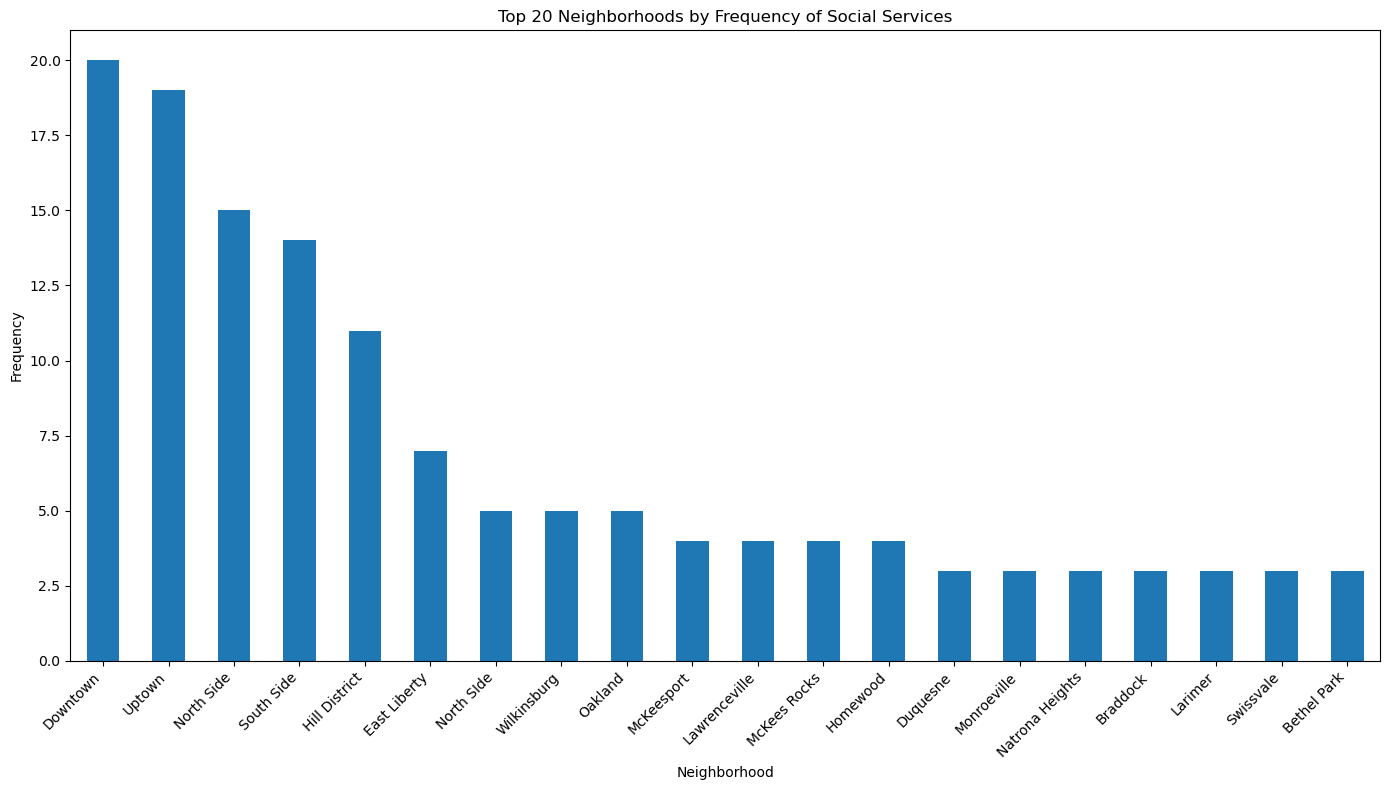

In [21]:
'''Now we need to count the number of times each neighborhood shows up in the data which is directly
associated with how many social services locations are in each neighborhood.
'''

#Store social services counts per neighborhood
neighborhood_counts = ss_data['neighborhood'].value_counts()


#Make dictionary for neighborhoods as keys and frequencies as values
neighborhood_dict = neighborhood_counts.to_dict()
print(neighborhood_dict)


#Table of the dictionary
neighborhood_table = pd.DataFrame({
    'Neighborhood': neighborhood_counts.index,
    'Frequency': neighborhood_counts.values
})

from IPython.display import display
display(neighborhood_table)


#Plot data in histogram for Social Services Frequency in Neighborhoods
plt.figure(figsize=(14, 8))
neighborhood_counts.head(20).plot(kind='bar')  # Display only the top 20 neighborhoods
plt.title('Top 20 Neighborhoods by Frequency of Social Services')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




,neighborhood,Number of Unique Categories
0,Aspinwall,1
1,Avalon,1
2,Baldwin,1
3,Beechview,1
4,Bellevue,1
...,...,...
73,WIlkinsburg,1
74,West End,1
75,Whitehall,1
76,Wilkinsburg,4


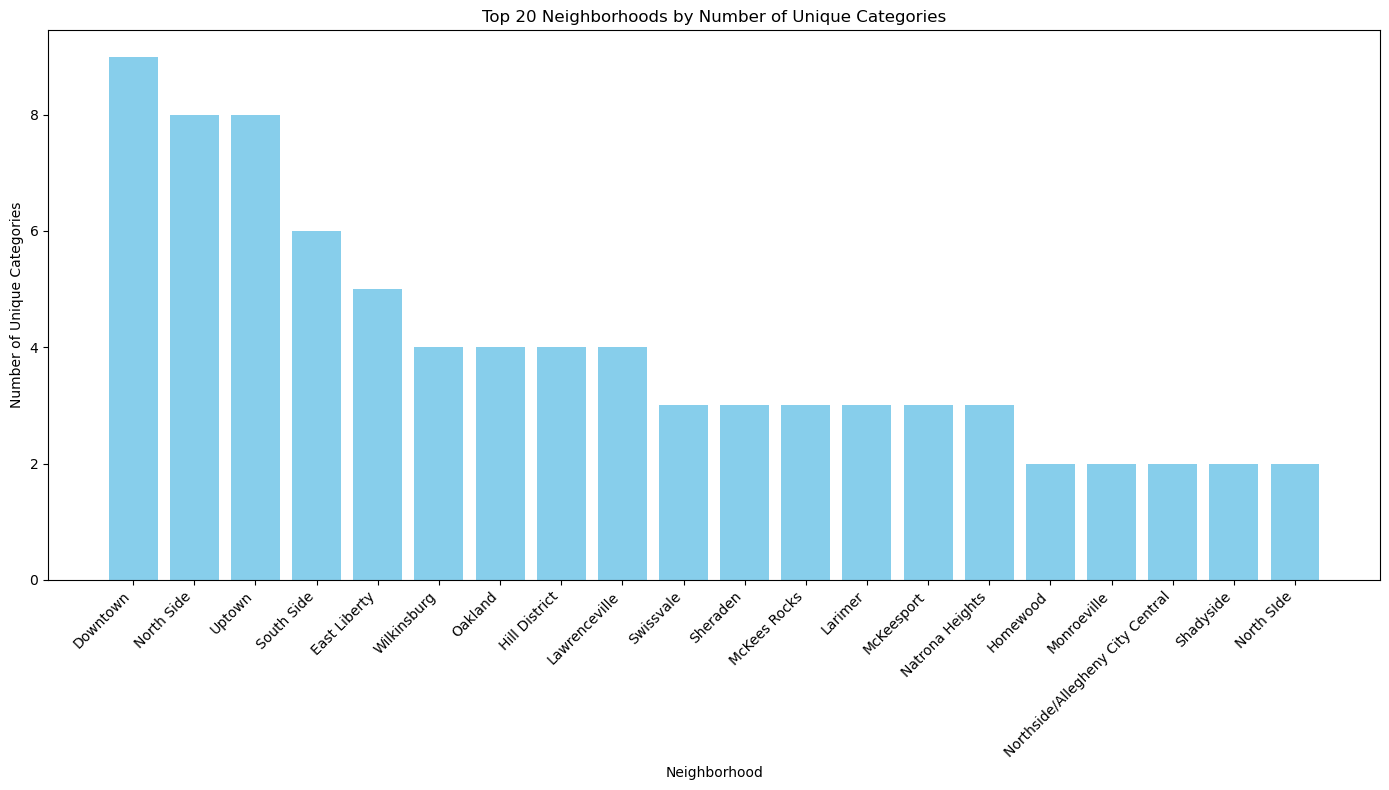

In [32]:
'''
For the additional indicator, we need to group by category and neighborhood and then count the frequency of the 
types of social services
'''

#Holds counts for unique categories of services by neighborhood 
unique_category_counts = ss_data.groupby('neighborhood')['category'].nunique().reset_index(name='Number of Unique Categories')
display(unique_category_counts)

#Plot the unique categories for each neighborhood in histogram style
top_unique_neighborhoods = unique_category_counts.sort_values(by='Number of Unique Categories', ascending=False).head(20)
plt.figure(figsize=(14, 8))
plt.bar(top_unique_neighborhoods['neighborhood'], top_unique_neighborhoods['Number of Unique Categories'], color='skyblue')
plt.title('Top 20 Neighborhoods by Number of Unique Categories')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Unique Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion

Now that these indicators are established, downtown is concluded to be the best neighborhood for this submetric of social services given that it has the highest freiquency of social services and has the most unique social services.